In [1]:
# data analysis
import numpy as np
import pandas as pd
import sys
import glob
import os,time

# plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15,12]

import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


In [2]:
datadir          = 'data/'

data_totalcases  = pd.read_csv(datadir + 'total_cases.csv')
data_totaldeaths = pd.read_csv(datadir + 'total_deaths.csv')
data_newcases    = pd.read_csv(datadir + 'new_cases.csv')
data_newdeaths   = pd.read_csv(datadir + 'new_deaths.csv')
data             = pd.read_csv(datadir + 'full_data.csv')
AllCountries     = [name for name in data_totalcases.keys() if name != 'date' and name != 'World']
datatime         = time.ctime(os.path.getmtime(datadir + 'total_cases.csv'))

print('Data downloaded: ' + datatime)

Data downloaded: Wed Mar 18 20:12:00 2020


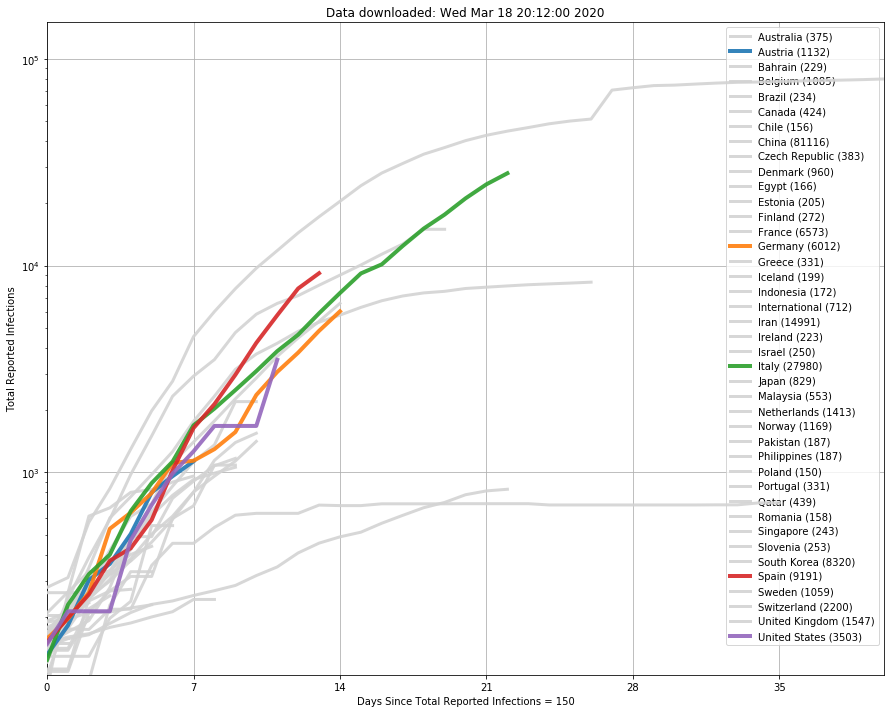

In [35]:
threshold  = 150

colornames       = [cn for cn in matplotlib.colors.TABLEAU_COLORS.keys() if (cn.upper() != 'TAB:WHITE' and cn.upper() != 'TAB:GRAY')]
x                = np.arange(len(data_totalcases['date']))
fig, ax          = plt.subplots()
lgnd             = []
scidx            = 0

specialcountries = ['Austria','Italy','Germany','Spain','United States']

for country in AllCountries:
    totinf = np.nan_to_num(data_totalcases[country])
    if totinf[-1] >= threshold:
        startday = np.argmin((totinf-threshold)**2)
        lgnd.append(country + ' ({:.0f})'.format(totinf[-1]))
        c  = 'lightgray'
        z  = 100
        lw = 3
        if country in specialcountries:
            c      = colornames[scidx % len(colornames)]
            z      = 101 + scidx
            lw     = 4
            scidx += 1
        ax.plot(x[:len(totinf[startday:])], totinf[startday:], c = c, zorder = z, lw = lw, alpha = .9)

plt.legend(lgnd)
plt.xlim([0,40])
ax.xaxis.set_major_locator(MultipleLocator(7))
plt.ylim([threshold*.7,1.5e5])
plt.xlabel(r'Days Since Total Reported Infections = {}'.format(threshold))
plt.ylabel(r'Total Reported Infections')
plt.title('Data downloaded: ' + datatime)
plt.yscale('log')
plt.grid()
plt.show()

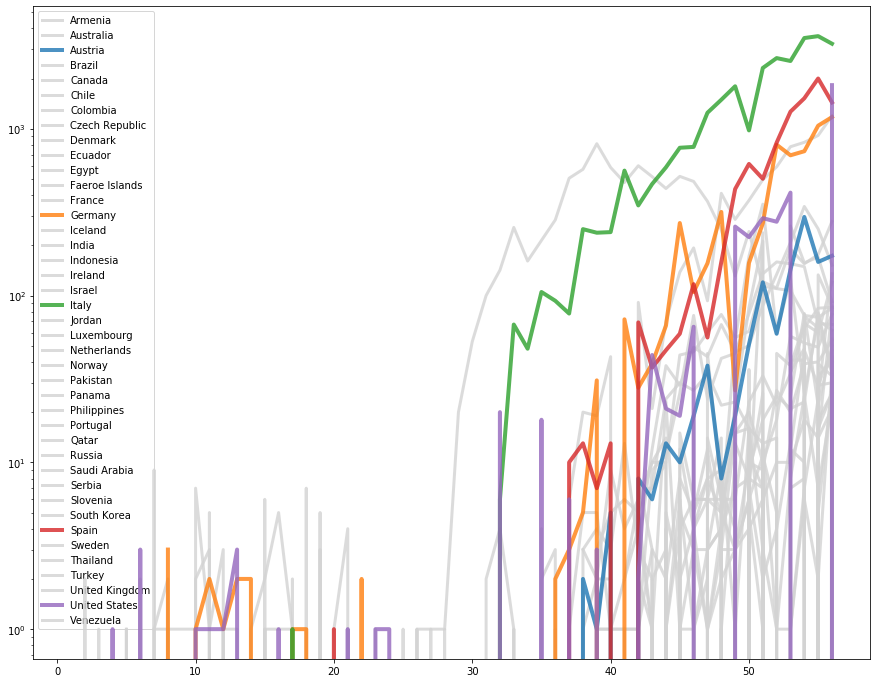

In [41]:
scidx = 0
lgnd = []
for country in AllCountries:
    newinf = np.nan_to_num(data_newcases[country])
    if country != 'China' and newinf[-1] > 20:
        lgnd.append(country)
        c  = 'lightgray'
        z  = 100
        lw = 3
        if country in specialcountries:
            c      = colornames[scidx % len(colornames)]
            z      = 101 + scidx
            lw     = 4
            scidx += 1
        plt.plot(x,data_newcases[country], c=c, zorder = z, lw = lw, alpha = .8)

plt.legend(lgnd)
plt.yscale('log')